In [1]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Train/'
val_dir = './Validation/'
test_dir = './Test/'


현재 경로 :  c:\Users\T\Desktop\Temp\5_Flower_Types_Classification_Generator


In [3]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)

In [4]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)


Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[0.22265837, 0.2697172 , 0.07363874],
         [0.22352943, 0.2740559 , 0.07277598],
         [0.22352943, 0.2784314 , 0.07058824],
         ...,
         [0.34117648, 0.44705886, 0.0699496 ],
         [0.33720267, 0.44573423, 0.07583442],
         [0.32941177, 0.44414502, 0.0844778 ]],

        [[0.21663143, 0.26071385, 0.06761181],
         [0.2212206 , 0.2682794 , 0.07220098],
         [0.22352943, 0.27118036, 0.07421375],
         ...,
         [0.33923018, 0.4464101 , 0.07515857],
         [0.32941177, 0.44346917, 0.0804228 ],
         [0.32942683, 0.44710398, 0.10205102]],

        [[0.20895638, 0.24202403, 0.06104999],
         [0.21231812, 0.2520872 , 0.0632985 ],
         [0.21978283, 0.26684165, 0.07076322],
         ...,
         [0.3304436 , 0.4434812 , 0.07808745],
         [0.32941177, 0.44639805, 0.09799602],
         [0.33235568, 0.45589057, 0.11962423]],

        ...,

        [[0.36078432, 0.3529412 , 0.27058825],
         [0.36078432, 0.3529412 , 0.27058825

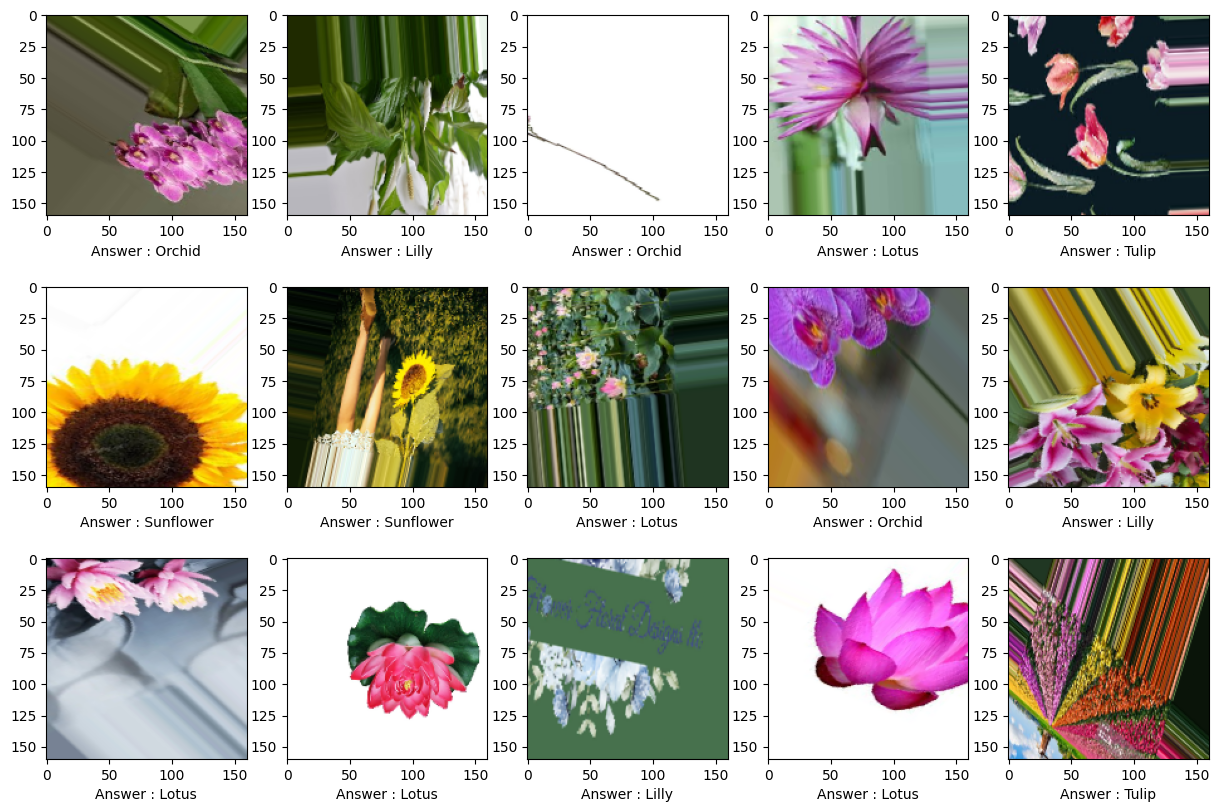

In [5]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [6]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 64)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.4))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.4))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
 
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 409600)            0         
                                                                 
 dense (Dense)               (None, 50)                20480050  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                        

In [7]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N02-1_size160_conv1-64_den1-50_epo15_val15_drop20.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [8]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=15, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/15
120/120 [==============================] - ETA: 0s - loss: 2.3640 - accuracy: 0.2813

C:\Users\T\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 282s 2s/step - loss: 2.3640 - accuracy: 0.2813 - val_loss: 1.2958 - val_accuracy: 0.4770
Epoch 2/15
120/120 [==============================] - 276s 2s/step - loss: 1.3252 - accuracy: 0.4583 - val_loss: 1.2285 - val_accuracy: 0.4904
Epoch 3/15
120/120 [==============================] - 278s 2s/step - loss: 1.2768 - accuracy: 0.4787 - val_loss: 1.1698 - val_accuracy: 0.5526
Epoch 4/15
120/120 [==============================] - 271s 2s/step - loss: 1.2541 - accuracy: 0.4957 - val_loss: 1.1705 - val_accuracy: 0.5526
Epoch 5/15
120/120 [==============================] - 281s 2s/step - loss: 1.2449 - accuracy: 0.4973 - val_loss: 1.1743 - val_accuracy: 0.5274
Epoch 6/15
120/120 [==============================] - 276s 2s/step - loss: 1.2232 - accuracy: 0.5080 - val_loss: 1.1517 - val_accuracy: 0.5585
Epoch 7/15
120/120 [==============================] - 275s 2s/step - loss: 1.2119 - accuracy: 0.5182 - val_loss: 1.1258 - val_accuracy: 0.5600
Epoch 8/15

In [9]:
# history의 key값 알아보기
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


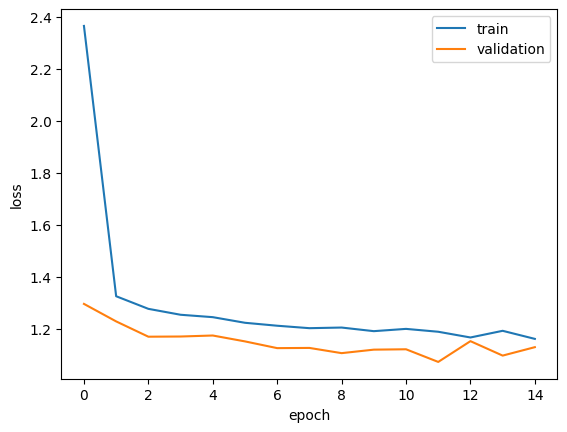

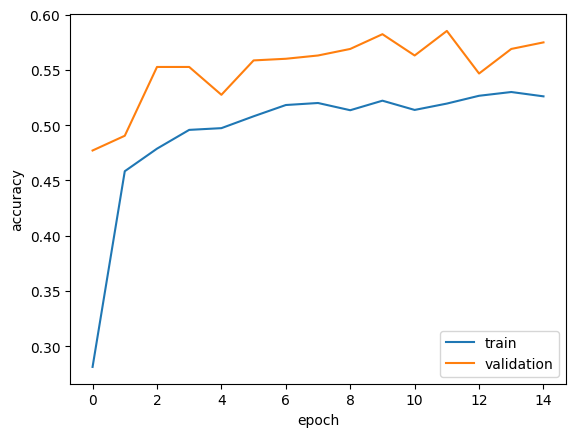

In [10]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [13]:
# test 평가
model.evaluate(test_gen)

16/16 [==============================] - 4s 213ms/step - loss: 1.0609 - accuracy: 0.5720


[1.060943365097046, 0.5720000267028809]

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
[0. 0. 1. 0. 0.]
32
1/1 [==============================] - 0s 251ms/step
[[2.75629669e-01 6.82395473e-02 1.12794816e-01 6.49942958e-04
  5.42686105e-01]
 [3.25577080e-01 6.66836947e-02 9.49776024e-02 6.74653724e-02
  4.45296288e-01]
 [2.18205750e-02 4.10511013e-04 3.05566285e-02 9.09300983e-01
  3.79113406e-02]
 [1.96407840e-01 2.06464782e-01 3.51708502e-01 4.42242995e-03
  2.40996450e-01]
 [2.76415139e-01 2.57886976e-0

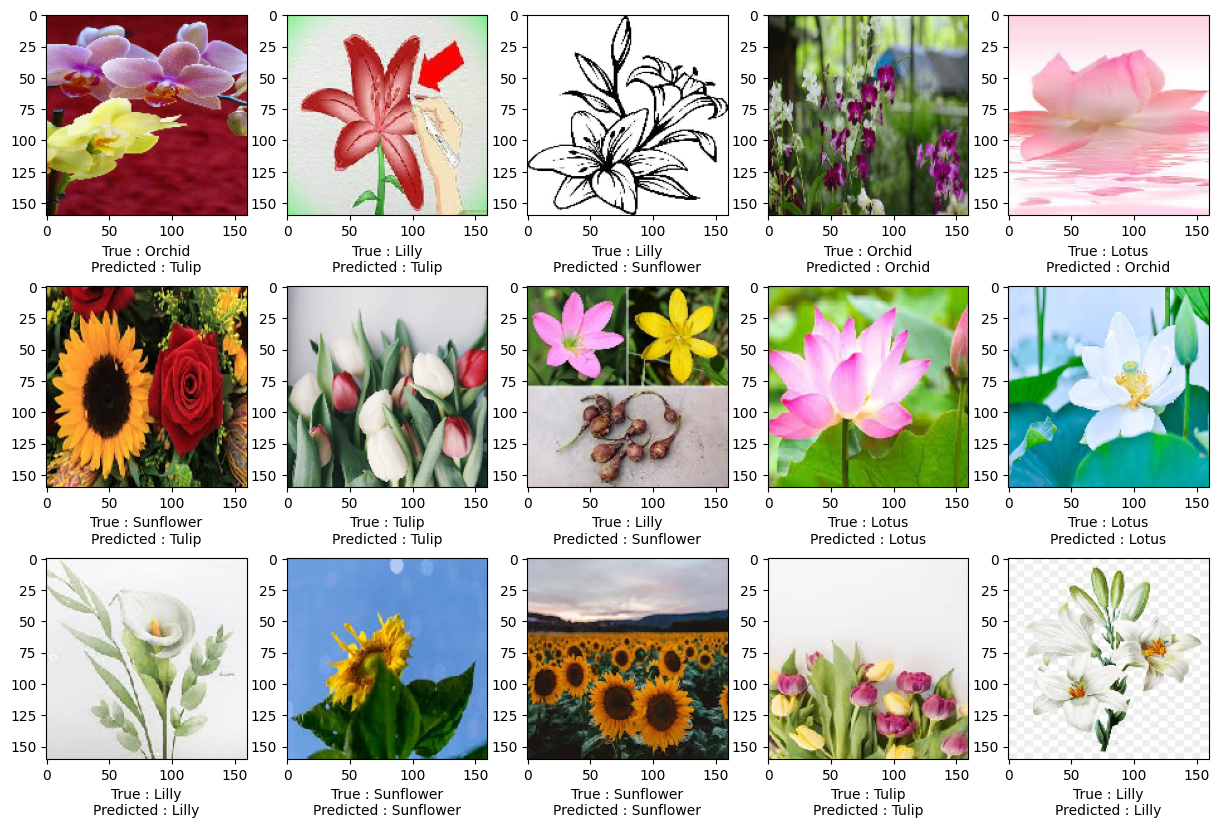

In [14]:
# test 평가 시각화
test_images, test_labels = next(test_gen)  

print(test_labels)
print(test_labels[0])
print(len(test_labels))

pred = model.predict(test_images)

print(pred)
print(pred[0])
print(len(pred))

plt.figure(figsize=(15, 10))
for i in range(15):  
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i])
    true_label = labels_dict[np.argmax(test_labels[i])]  
    predicted_label = labels_dict[np.argmax(pred[i])]  
    plt.xlabel(f'True : {true_label}\nPredicted : {predicted_label}')

plt.show()